## Principal component analysis
We will be performing a PCA on the classic MNIST dataset of handwritten digits.

Wikipedia page has good description of principal component analysis
https://en.wikipedia.org/wiki/Principal_component_analysis

### Explore the data

Import the dataset and use `pylab` to explore.

In [97]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pylab as pl
# %matplotlib inline
%pylab inline
pl.gray();

Populating the interactive namespace from numpy and matplotlib


/Users/justin/anaconda/envs/nlp/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


    
See [load_digits documentation.](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
    
Using one figure with 100 subplots in 10-by-10 grid,  display the first 100 images using `pl.imshow`.

![100digits](imgs/first_100_digits.png)

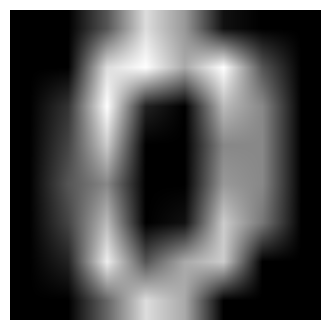

In [98]:
pl.imshow(digits.images[0])
pl.xticks([]), pl.yticks([]) and pl.axis('off')
pl.show()

    
To display only the images, use `pl.xticks([]), pl.yticks([])` and  `pl.axis('off')`.
    
#### PCA on subset

For simplicity we will look at the first 6 digits.

1- Load the first 6 digits of the MNIST digits dataset using [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

In [99]:
import sklearn
six_digits = sklearn.datasets.load_digits(n_class=6).data
len(six_digits[0])
six_digits

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   9.,   0.,   0.],
       [  0.,   0.,   0., ...,   4.,   0.,   0.],
       [  0.,   0.,   6., ...,   6.,   0.,   0.]])

2- For PCA, it is important that our data is normalized/scaled.  Using scikit-learn's [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), scale the digits dataset.

In [100]:
scaler = sklearn.preprocessing.StandardScaler().fit_transform(six_digits)
scaler

array([[ 0.        , -0.39943855, -0.16703526, ..., -1.14434334,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  0.62132675,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  1.68072881,
         1.54537005, -0.24520445],
       ..., 
       [ 0.        , -0.39943855, -1.14805039, ...,  0.44475974,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ..., -0.4380753 ,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855,  0.02916776, ..., -0.08494129,
        -0.48218707, -0.24520445]])

3- Now that we have properly scaled images, we can apply the PCA transformation.  Using scikit-learn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), project our digits dataset into lower dimensional space.  First try 10 components.

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit_transform(scaler)

array([[ 2.695426  ,  4.13565459,  1.06981517, ..., -0.26717553,
        -0.47442675,  0.14157113],
       [ 0.03399774, -4.50662533, -1.3688463 , ...,  1.34628811,
         0.28946802,  0.67223066],
       [ 0.75983827, -2.65682896, -2.21919112, ..., -0.79101065,
         1.78032836, -0.2405179 ],
       ..., 
       [ 6.14955481, -1.24699913, -1.31891848, ..., -1.53308987,
         0.28247517, -1.22250509],
       [ 6.21770529, -2.07661455,  0.05631037, ..., -1.04663258,
         0.09273138, -1.30440584],
       [ 3.13906126,  3.45679573,  1.3395955 , ..., -0.61669178,
        -0.39854991,  1.04938074]])

4- Due to the loss of information in projecting data into lower dimensional space, our transformation is never perfect. One way we can determine how well it worked is to plot the amount of explained variance.  Using the function snippet below, plot the amount of explained variance of each of the principle components.

In [102]:
def scree_plot(num_components, pca, title=None):
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in range(num_components):
            ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]),
                        va="bottom", ha="center", fontsize=12)
    ax.set_xticklabels(ind, fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

Populating the interactive namespace from numpy and matplotlib


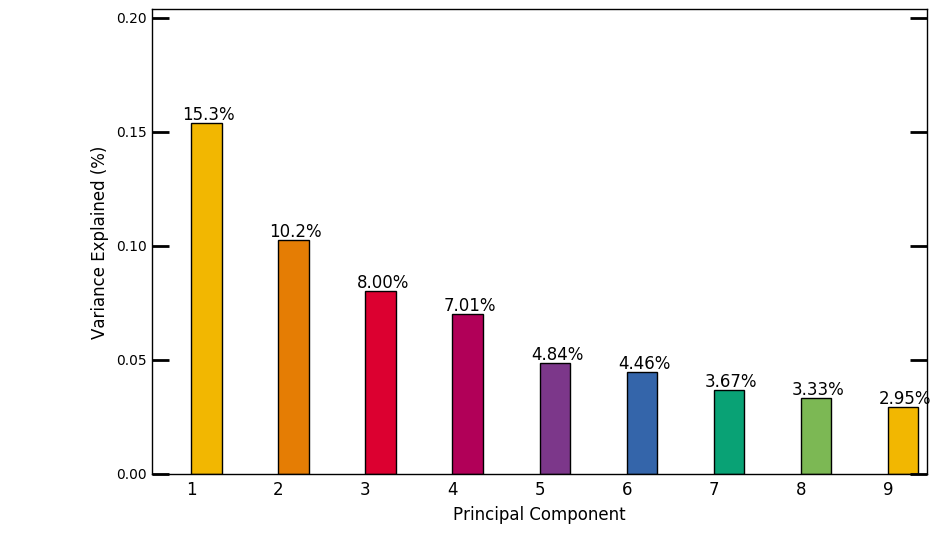

In [103]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import numpy as np
%pylab inline

scree_plot(10, pca)

5- We need to pick an appropriate number of components to keep.  Looking at the plot of explained variance, we are interested in finding the least number of principle components that explain the most variance. What is the optimal number of components to keep for the digits dataset?

6- Plot each of the eigen-vectors as images.  
    
Another way to visualize our digits is to force a projection into 2-dimensional space in order to visualize the data on a 2-dimensional plane. The code snippet below will plot our digits projected into 2-dimensions on x-y axis.

In [104]:
# take first 4 components

cov = (scaler.T @ scaler) / len(scaler)
w, v = np.linalg.eig(cov)

In [105]:
# v[:, 0]

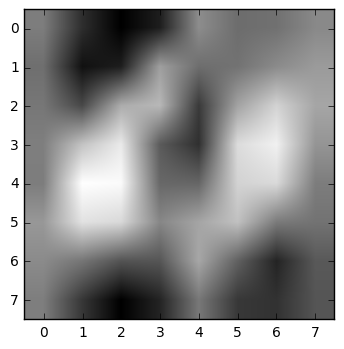

In [106]:
pl.imshow(v[:, 0].reshape(8,8))  # principal eigenvector

In [107]:
# plot projection

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

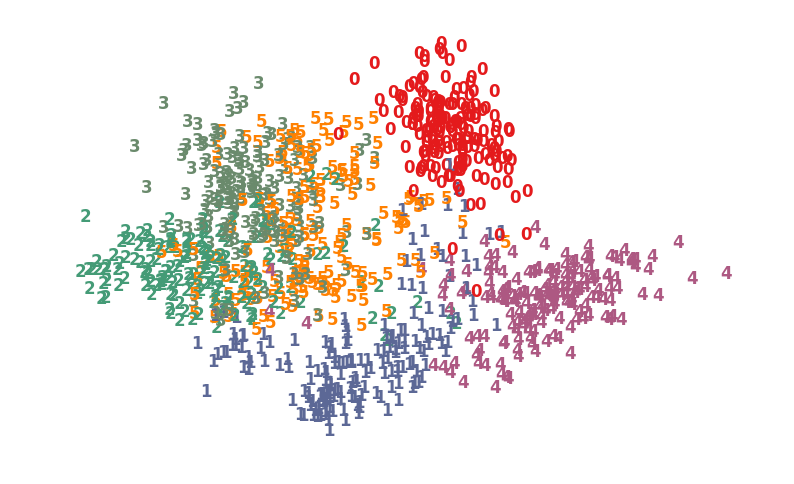

In [108]:
pca2 = PCA(n_components = 2)
proj = pca2.fit_transform(scaler)
plot_embedding(proj, load_digits(6).target)

7- Using the above method, project the digits dataset into 2-dimensions.  Do you notice anything about the resulting projections?  Does the plot remind you of anything?  Looking at the results, which digits end up near each other in 2-dimensional space?  Which digits have overlap in this new feature space?

There are 6 different categorical clusters.  I noticed that the digits that look similar to each other ended up close to each other on the projection plot - for instance, 2 looks similar to 3, or at least moreso than comparisons among other digits.  It reminds me of k-nearest neighbors clustering.  Digits 5 and 3 end up near each other, and in fact, 2, 3, and 5 overlap in this new feature space.